# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from datetime import datetime, timedelta
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime 
import dateutil.tz

In [2]:
URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
today_number = [txt.text for txt in soup.find_all('tr', class_='total_row')[0].find_all('td')]
yesterday_number = [txt.text for txt in soup.find_all('tr', class_='total_row')[1].find_all('td')]
now = datetime.now(dateutil.tz.tzutc())
print("Data Pulled @ {}".format(now))
print("\n<<RECENT UPDATE>>")
print(' Total Cases \t\t: {}\n New Cases \t\t: {}\n Total Deaths \t\t: {}\n New Deaths \t\t: {}\n Total Recovered \t: {}\n\
 Active Cases \t\t: {}\n Serious Critical \t: {}'.format(today_number[1],today_number[2],today_number[3],today_number[4]\
                                                 ,today_number[5],today_number[6],today_number[7]))
print("\n<<Yesterday>>")
print(' Total Cases \t\t: {}\n New Cases \t\t: {}\n Total Deaths \t\t: {}\n New Deaths \t\t: {}\n Total Recovered \t: {}\n\
 Active Cases \t\t: {}\n Serious Critical \t: {}'.format(yesterday_number[1],yesterday_number[2],yesterday_number[3],yesterday_number[4]\
                                                 ,yesterday_number[5],yesterday_number[6],yesterday_number[7]))

# job_elems = soup.find_all('script', type='text/javascript')
# for job_elem in job_elems:
#     if (job_elem.get_text().find('Highcharts.chart')!=-1):        
#         for line in job_elem.get_text().split('\n'):            
#             if(line.find(' Highcharts.chart(')!=-1):
#                 print(line)
#             if(line.find('data')!=-1):
#                 data = line.split('[')[1].split(']')[0].split(',')
#                 print(data)

Data Pulled @ 2020-04-01 14:53:48.968380+00:00

<<RECENT UPDATE>>
 Total Cases 		: 885,294
 New Cases 		: +26,975
 Total Deaths 		: 44,212
 New Deaths 		: +1,910
 Total Recovered 	: 185,208
 Active Cases 		: 655,874
 Serious Critical 	: 33,778

<<Yesterday>>
 Total Cases 		: 858,319
 New Cases 		: +73,660
 Total Deaths 		: 42,302
 New Deaths 		: +4,533
 Total Recovered 	: 177,931
 Active Cases 		: 638,086
 Serious Critical 	: 32,898


# Load CSV Files
* Total Cases

In [3]:
s0=requests.get('https://covid.ourworldindata.org/data/ecdc/total_cases.csv').content
total_cases = pd.read_csv(io.StringIO(s0.decode('utf-8'))).set_index('date')
total_cases.columns.name='Country/Region'
total_cases.tail()

Country/Region,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-28,591704,91.0,186.0,305.0,267.0,4.0,2.0,7.0,690.0,372.0,...,14543,104686,19.0,238.0,104.0,5.0,119.0,169.0,16.0,5.0
2020-03-29,656866,106.0,197.0,409.0,308.0,4.0,2.0,7.0,745.0,424.0,...,17089,124665,22.0,304.0,133.0,6.0,119.0,223.0,28.0,7.0
2020-03-30,715353,114.0,212.0,454.0,334.0,7.0,2.0,7.0,820.0,424.0,...,19522,143025,30.0,309.0,145.0,6.0,119.0,228.0,29.0,7.0
2020-03-31,777797,141.0,223.0,511.0,370.0,7.0,2.0,7.0,966.0,482.0,...,22141,164620,NaN,320.0,149.0,6.0,135.0,229.0,35.0,7.0
2020-04-01,853200,166.0,243.0,584.0,376.0,7.0,2.0,7.0,966.0,532.0,...,25150,189618,30.0,338.0,173.0,6.0,135.0,229.0,35.0,8.0


* Total Deaths

In [4]:
s1=requests.get('https://covid.ourworldindata.org/data/ecdc/total_deaths.csv').content
total_deaths = pd.read_csv(io.StringIO(s1.decode('utf-8'))).set_index('date')
total_deaths.columns.name='Country/Region'
total_deaths.tail()

Country/Region,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-28,26988,2.0,9.0,21.0,3.0,0.0,0.0,0.0,17.0,1.0,...,759,1707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-29,30449,3.0,10.0,26.0,4.0,0.0,0.0,0.0,19.0,3.0,...,1019,2191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2020-03-30,33574,4.0,10.0,29.0,6.0,2.0,0.0,0.0,20.0,3.0,...,1228,2509,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2020-03-31,37271,4.0,12.0,31.0,8.0,2.0,0.0,0.0,24.0,3.0,...,1408,3170,NaN,1.0,2.0,0.0,3.0,0.0,0.0,1.0
2020-04-01,41887,4.0,15.0,35.0,12.0,2.0,0.0,0.0,24.0,3.0,...,1789,4079,0.0,1.0,2.0,0.0,3.0,0.0,0.0,1.0


* Total Recovered

In [5]:
s2=requests.get('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv').content
total_recovered_raw = pd.read_csv(io.StringIO(s2.decode('utf-8')))
tr = total_recovered_raw.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum().transpose()
tr = tr.rename(columns={"US":"United States",'Korea, South':'South Korea'})
tr_idx = tr.index
tr_idx_formatted = [(datetime.strptime(idx,'%m/%d/%y').strftime('%Y-%m-%d')) for idx in tr_idx]
tr = tr.set_index([pd.Series(tr_idx_formatted)])
tr_sum = tr.sum(axis=1).to_frame()
tr_sum.columns={"World"}
total_recovered = pd.concat([tr, tr_sum.reindex(tr.index)], axis=1)
total_recovered.index.names=['date']
total_recovered.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe,World
date,,,,,,,,,,,,,,,,,,,,,
2020-03-27,2,31,29,1,0,0,72,28,194,225,...,52,151,0,5,31,20,17,0,0,130915
2020-03-28,2,31,31,1,0,0,72,30,244,225,...,52,151,0,5,39,21,18,0,0,139415
2020-03-29,2,33,31,1,0,0,72,30,244,479,...,58,151,0,7,39,25,18,0,0,149082
2020-03-30,2,44,37,10,0,0,228,30,257,636,...,61,171,0,7,39,55,18,0,0,164566
2020-03-31,5,52,46,10,1,0,240,30,358,1095,...,61,179,41,7,39,58,18,0,0,178034


# Select focused data
* List current top twenties countries and Singapore + Malaysia

In [6]:
# today_str = datetime.utcnow().date().strftime('%Y-%m-%d')
# yesterday_str = (datetime.utcnow().date()-timedelta(days=1)).strftime('%Y-%m-%d')
tc_idx = total_cases.index
tc_latest_date = tc_idx[len(tc_idx)-1]
print("Latest Data Date : " , tc_latest_date)
total_cases = total_cases.sort_values(by=tc_latest_date,axis=1,ascending=False)
total_deaths = total_deaths.sort_values(by=tc_latest_date,axis=1,ascending=False)
Top_20 = list(total_cases.columns[0:21])
print('Top 20 countries are : ', Top_20[1:21])
Interested_countries = Top_20 + ['Singapore','Malaysia']

Latest Data Date :  2020-04-01
Top 20 countries are :  ['United States', 'Italy', 'Spain', 'China', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland', 'Turkey', 'Belgium', 'Netherlands', 'Austria', 'South Korea', 'Canada', 'Portugal', 'Brazil', 'Israel', 'Australia', 'Norway']


* Filter with only the interested countries

In [7]:
IC_total_cases = total_cases[Interested_countries].fillna(method='ffill').fillna(0)
IC_total_deaths = total_deaths[Interested_countries].fillna(method='ffill').fillna(0)
IC_total_recovered = total_recovered[Interested_countries]

* Get growth rate tables

In [8]:
IC_total_cases_inc = IC_total_cases.diff(axis=0).fillna(0)
IC_total_cases_inc.tail()

Country/Region,World,United States,Italy,Spain,China,Germany,France,Iran,United Kingdom,Switzerland,...,Austria,South Korea,Canada,Portugal,Brazil,Israel,Australia,Norway,Singapore,Malaysia
date,,,,,,,,,,,,,,,,,,,,,
2020-03-28,63937.0,18695.0,5959.0,7871.0,119.0,6294.0,3809.0,2926.0,2885.0,1390.0,...,668.0,146.0,671.0,724.0,502.0,369.0,212.0,425.0,138.0,130.0
2020-03-29,65162.0,19979.0,5974.0,8189.0,113.0,3965.0,4611.0,3076.0,2546.0,1048.0,...,594.0,105.0,697.0,902.0,487.0,584.0,431.0,264.0,71.0,159.0
2020-03-30,58487.0,18360.0,5217.0,6549.0,98.0,4751.0,2599.0,2901.0,2433.0,1122.0,...,522.0,78.0,869.0,792.0,352.0,628.0,284.0,257.0,41.0,150.0
2020-03-31,62444.0,21595.0,4050.0,6398.0,84.0,4615.0,4376.0,3186.0,2619.0,1138.0,...,805.0,125.0,1169.0,446.0,323.0,226.0,464.0,124.0,0.0,156.0
2020-04-01,75403.0,24998.0,4053.0,9222.0,54.0,5453.0,7578.0,3111.0,3009.0,696.0,...,564.0,0.0,1112.0,1035.0,1138.0,443.0,150.0,221.0,35.0,0.0


In [9]:
# Moving average
IC_total_cases_inc_ma = IC_total_cases_inc.rolling(window=3).mean()
IC_total_cases_inc_ma.tail()

Country/Region,World,United States,Italy,Spain,China,Germany,France,Iran,United Kingdom,Switzerland,...,Austria,South Korea,Canada,Portugal,Brazil,Israel,Australia,Norway,Singapore,Malaysia
date,,,,,,,,,,,,,,,,,,,,,
2020-03-28,58286.333333,16485.000000,5774.000000,8128.666667,105.000000,5676.000000,3554.0,2507.000000,2155.333333,1105.000000,...,805.000000,113.666667,910.000000,635.333333,405.333333,368.333333,318.333333,338.333333,58.000000,179.000000
2020-03-29,62939.000000,18490.333333,6028.666667,8212.666667,108.666667,5346.333333,4114.0,2797.000000,2520.000000,1146.000000,...,801.000000,114.000000,667.000000,725.000000,490.333333,416.666667,336.666667,309.666667,78.333333,174.666667
2020-03-30,62528.666667,19011.333333,5716.666667,7536.333333,110.000000,5003.333333,3673.0,2967.666667,2621.333333,1186.666667,...,594.666667,109.666667,745.666667,806.000000,447.000000,527.000000,309.000000,315.333333,83.333333,146.333333
2020-03-31,62031.000000,19978.000000,5080.333333,7045.333333,98.333333,4443.666667,3862.0,3054.333333,2532.666667,1102.666667,...,640.333333,102.666667,911.666667,713.333333,387.333333,479.333333,393.000000,215.000000,37.333333,155.000000
2020-04-01,65444.666667,21651.000000,4440.000000,7389.666667,78.666667,4939.666667,4851.0,3066.000000,2687.000000,985.333333,...,630.333333,67.666667,1050.000000,757.666667,604.333333,432.333333,299.333333,200.666667,25.333333,102.000000


# Plot data

C:\Users\kohte\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\kohte\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


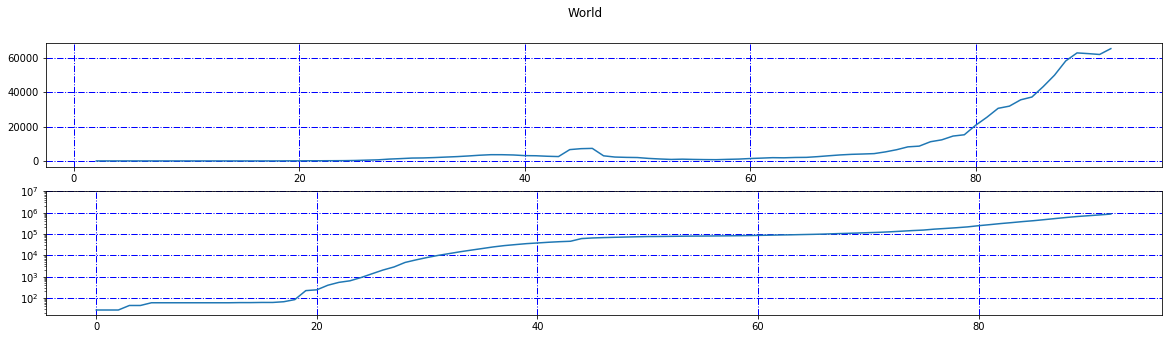

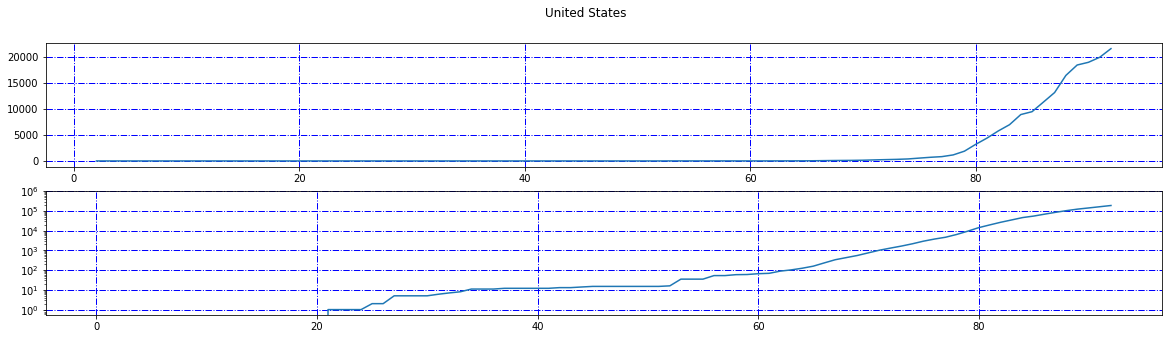

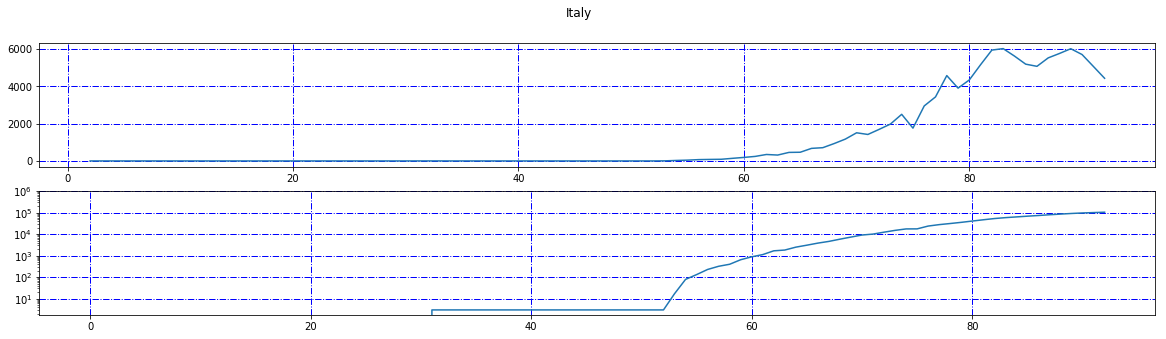

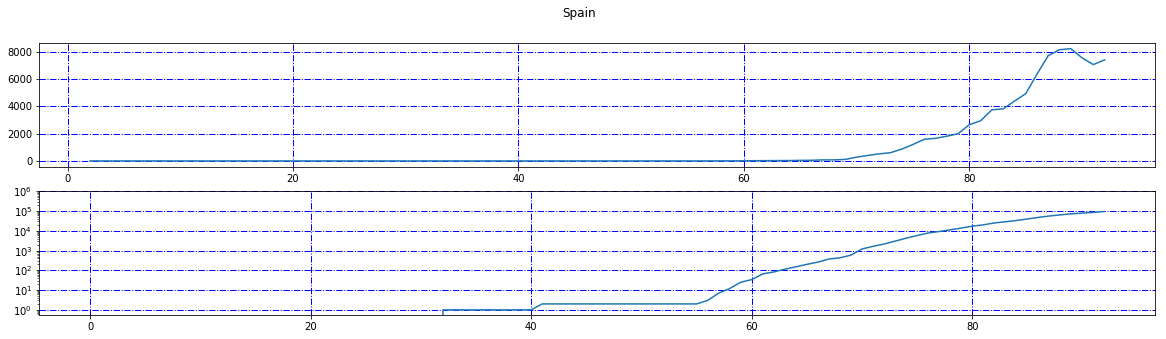

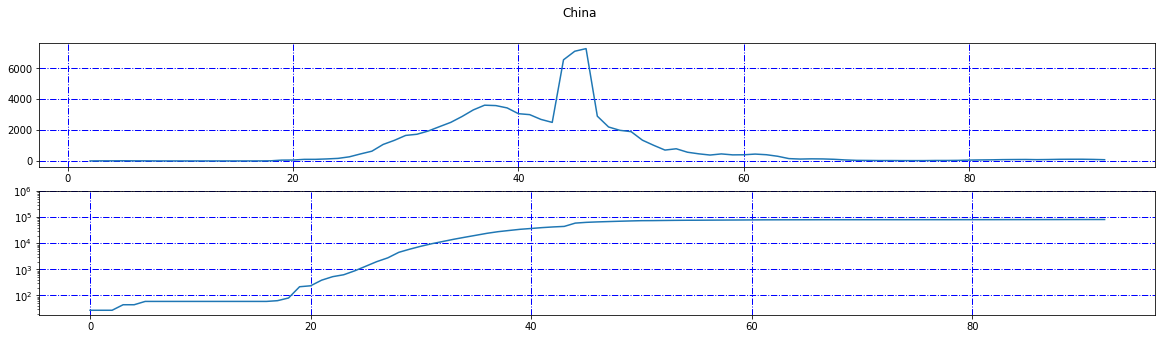

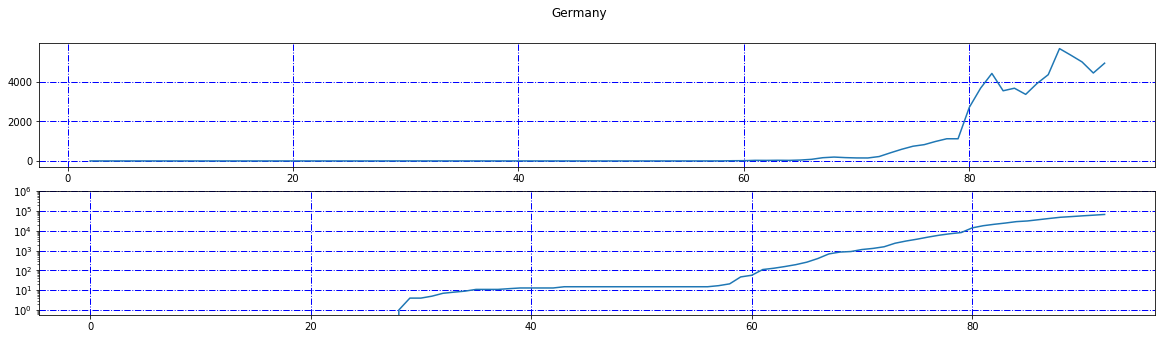

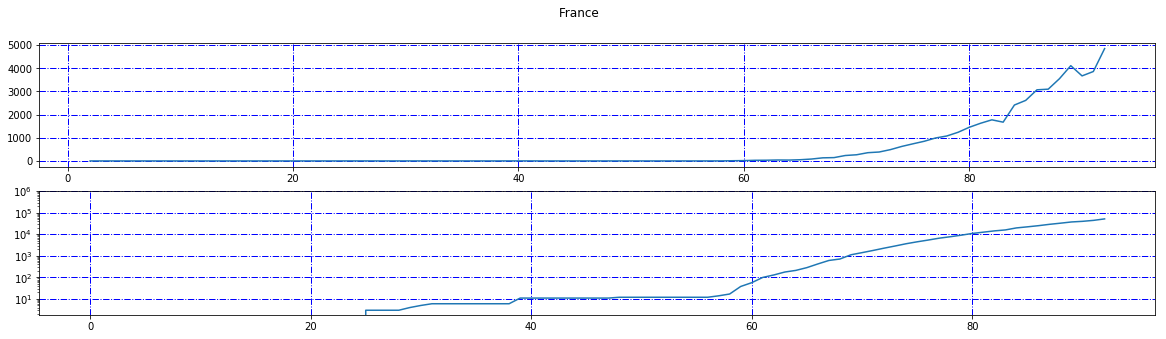

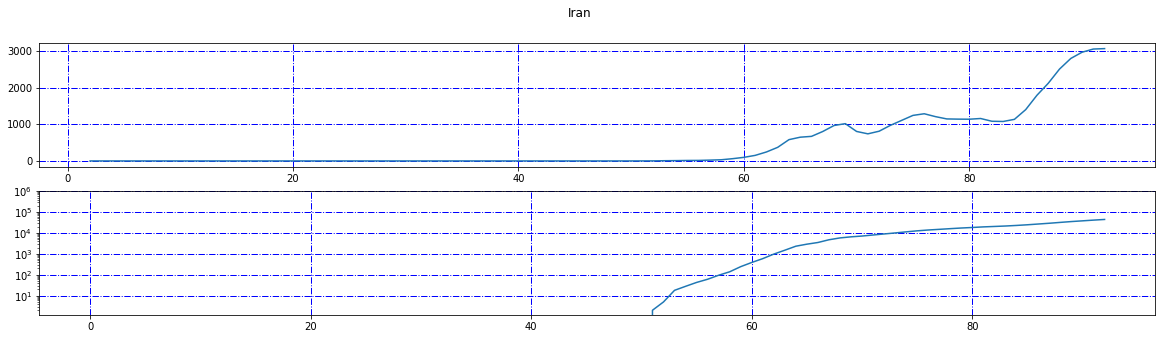

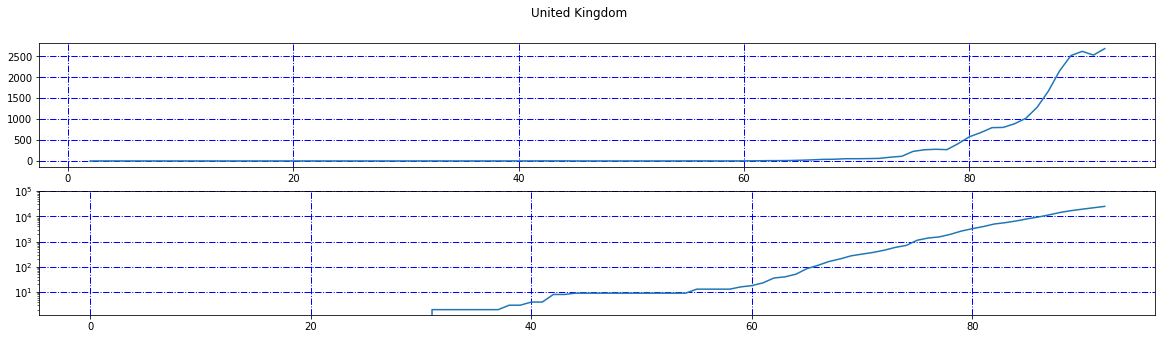

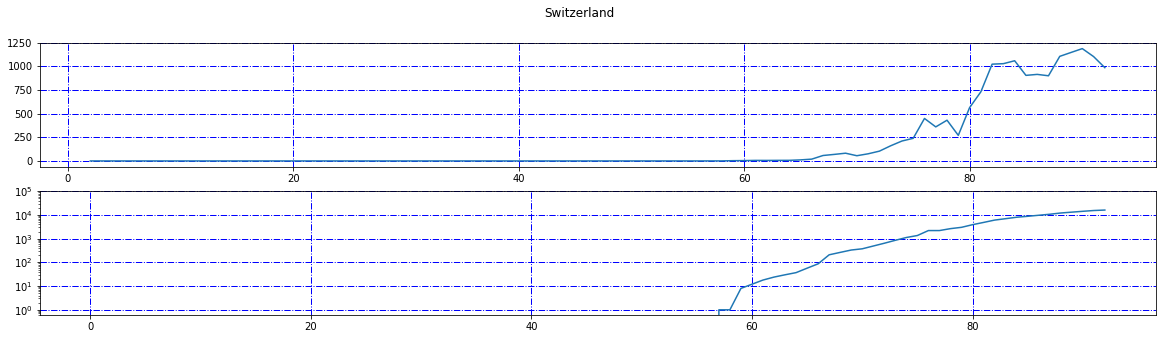

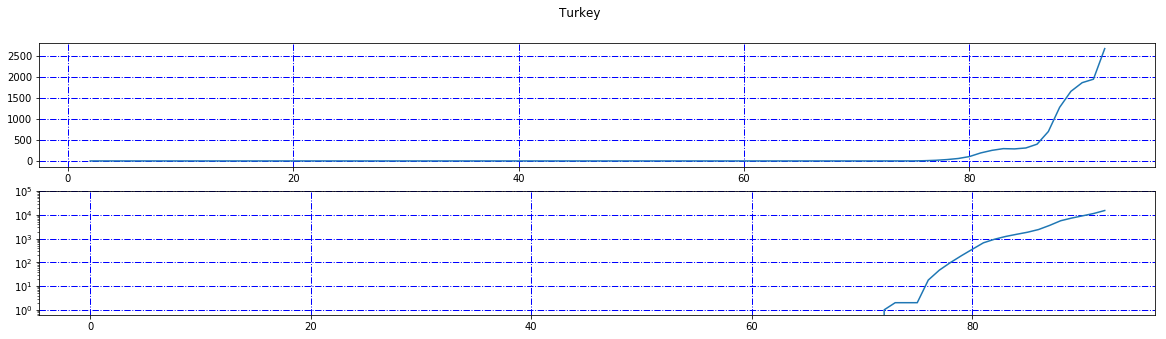

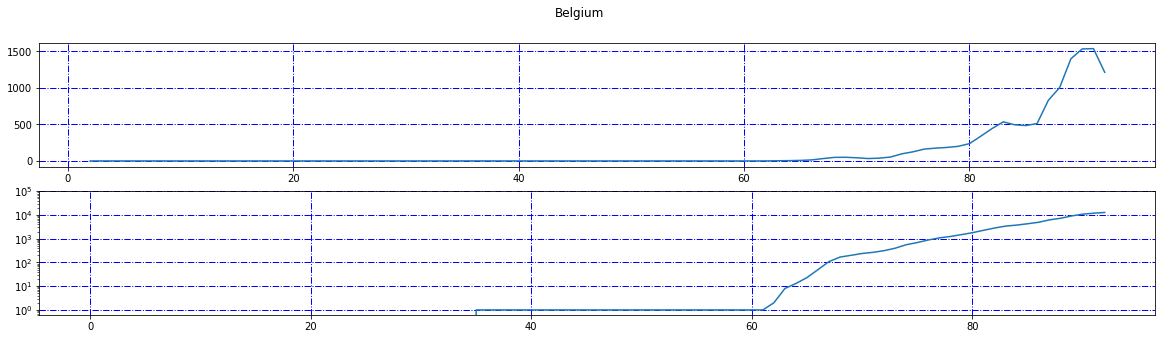

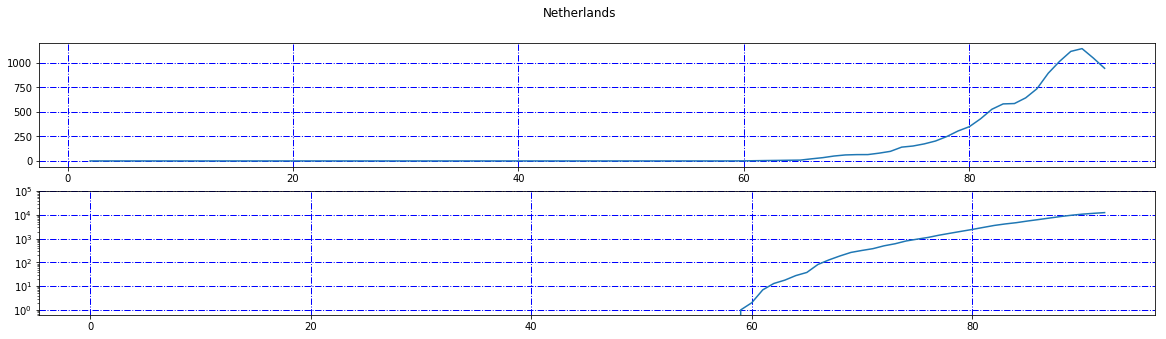

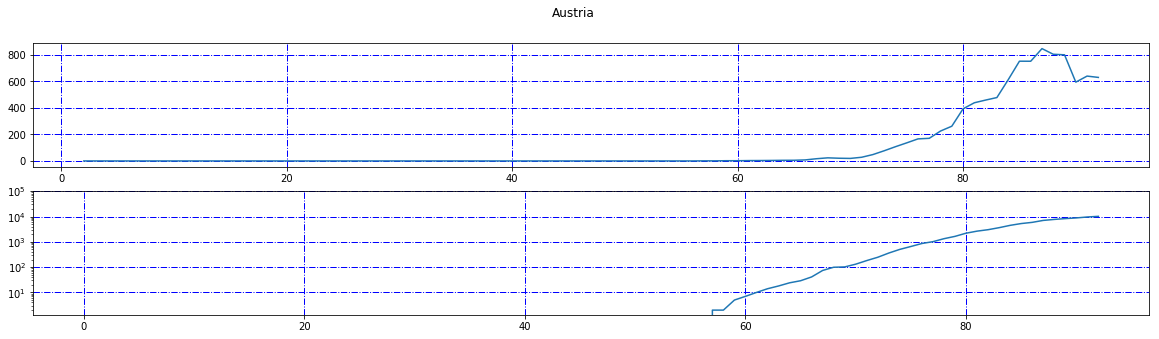

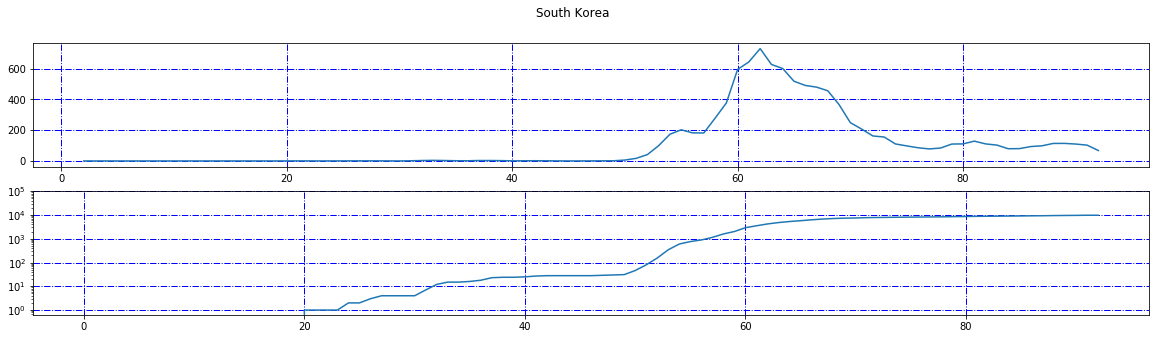

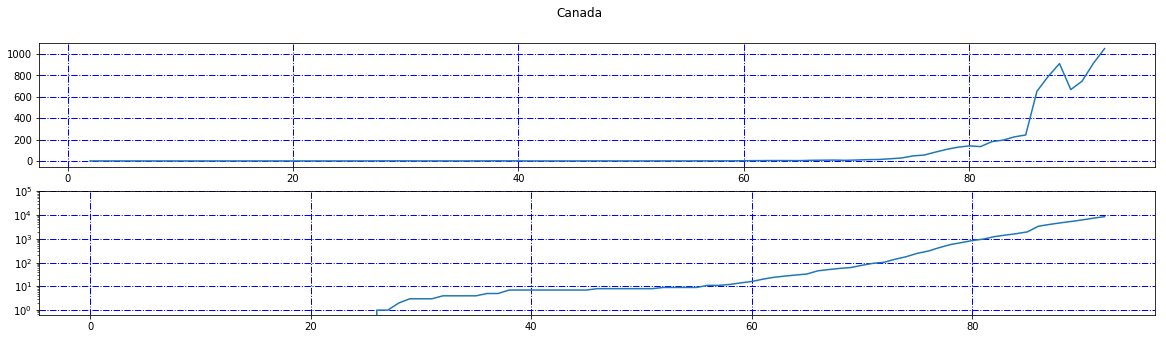

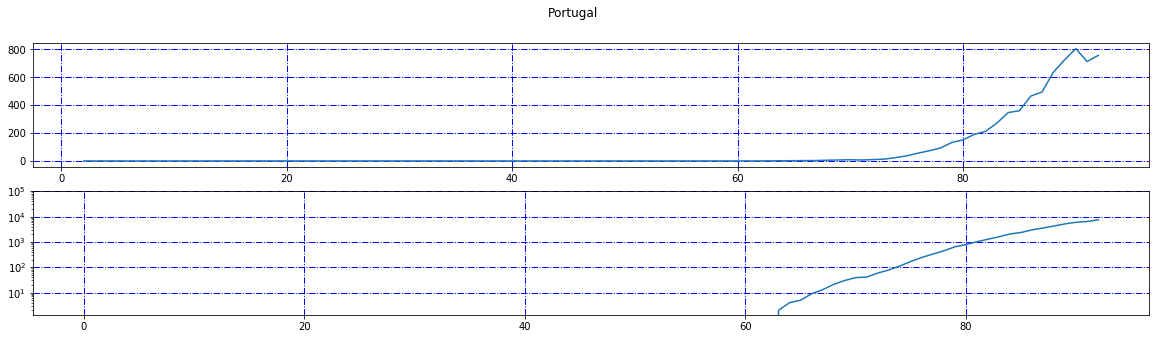

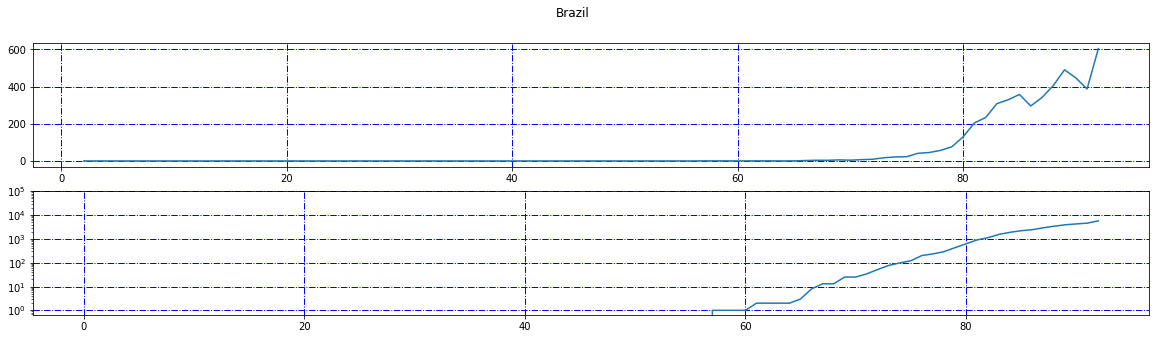

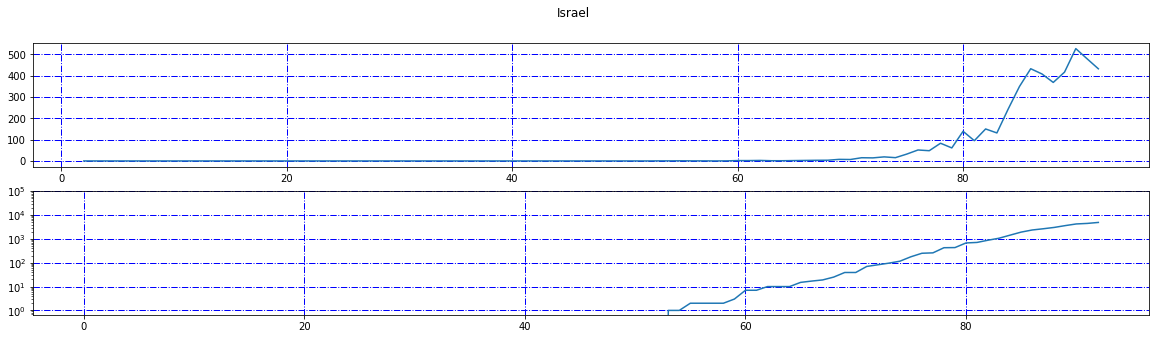

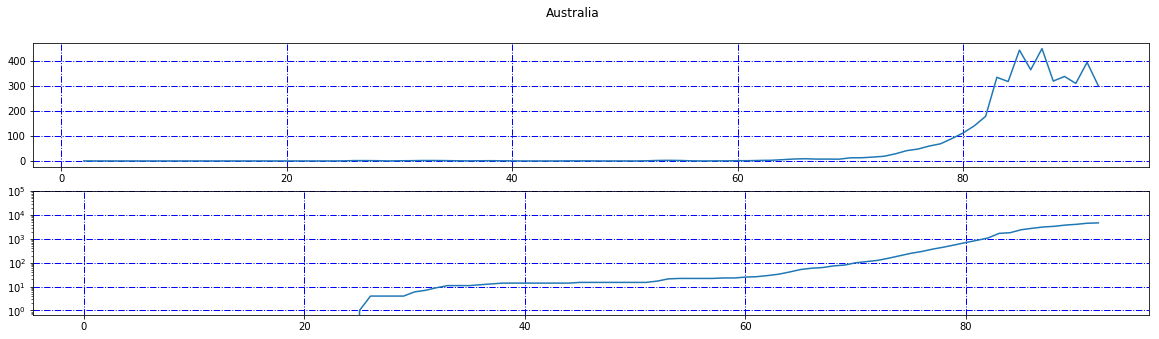

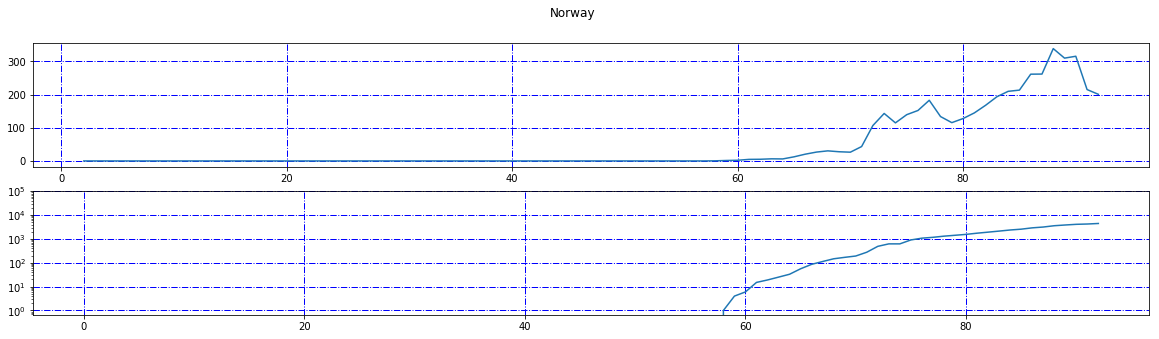

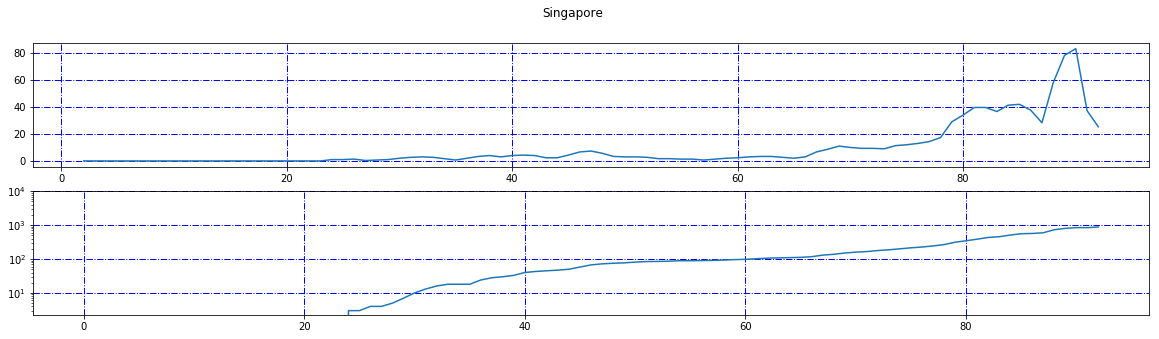

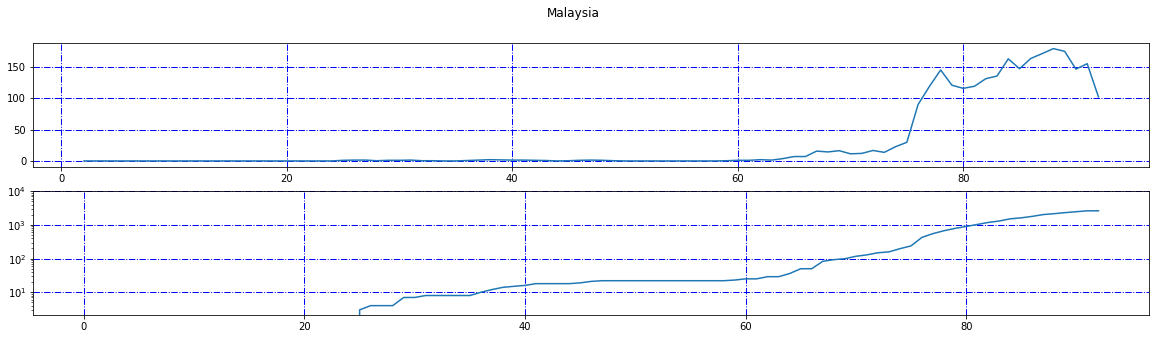

In [10]:
for country in Interested_countries:
    plt.rcParams["figure.figsize"] = (20,5)
    fig, (ax1, ax2) = plt.subplots(2)        
    ax1.grid(color='b', linestyle='-.', linewidth=1)
    ax1.plot(list(IC_total_cases_inc_ma[country]))   
    ax2.set_yscale('log')
    ls_IC_total_cases = list(IC_total_cases[country])
    ax2.plot(ls_IC_total_cases)
    ax2.grid(color='b', linestyle='-.', linewidth=1)
    ax2.set_ylim([0,10**(round(np.log10(max(ls_IC_total_cases)))+1)])
    fig.suptitle(country)
    

# Plot table

In [11]:
tr_idx = total_recovered.index
tr_latest_date = tr_idx[len(tr_idx)-1]
print(tr_latest_date)
last_day_rate = [int(IC_total_cases_inc[country][-1]) for country in Interested_countries]
last_3days_rate = [int(IC_total_cases_inc_ma[country][-1].mean()) for country in Interested_countries]
last_7days_rate = [int(IC_total_cases_inc[country][-7:-1].mean()) for country in Interested_countries]
TotalCase = [IC_total_cases[country][-1] for country in Interested_countries]
TotalDeath = [IC_total_deaths[country][-1] for country in Interested_countries]
TotalRecovered = list(IC_total_recovered.loc[tr_latest_date,:])
DeathRatio = [td/(tr+td)*100 for td, tr in zip(TotalDeath, TotalRecovered)]
Dropping = [l3<l7 for l3, l7 in zip(last_3days_rate, last_7days_rate)]


last_rate_dict = {'country':Interested_countries, 'Last day inc':last_day_rate,'Last 3 days average inc' :last_3days_rate, 
                  'Last 7 days inc':last_7days_rate, 'TotalCase': TotalCase, 'TotalRecovered':TotalRecovered,
                  'TotalDeath': TotalDeath, 'DeathRatio %': DeathRatio, 'Dropping':Dropping}
pd.DataFrame.from_dict(last_rate_dict).set_index('country')

2020-03-31


,Last day inc,Last 3 days average inc,Last 7 days inc,TotalCase,TotalRecovered,TotalDeath,DeathRatio %,Dropping
country,,,,,,,,
World,75403,65444,60158,853200.0,178034,41887.0,19.046385,False
United States,24998,21651,18231,189618.0,7024,4079.0,36.737819,False
Italy,4053,4440,5427,105792.0,15729,12430.0,44.142193,True
Spain,9222,7389,7587,94417.0,19259,8189.0,29.834596,True
China,54,78,101,82295.0,76206,3310.0,4.162684,True
Germany,5453,4939,5059,67366.0,16100,732.0,4.348859,True
France,7578,4851,3708,52128.0,9513,3523.0,27.025161,False
Iran,3111,3066,2780,44606.0,14656,2898.0,16.509058,False
United Kingdom,3009,2687,2344,25150.0,179,1789.0,90.904472,False
